## **Grupo: Gabriel Soave Trifoni e João Marcelo Muniz Santos**

## **Exercicio 3**

Utilizando o conjunto wine (load_wine) execute os algoritmos SL, CL, AL e k-means, todos com k=3, testando a distância euclidiana e a cityblock. Avalie todas as configurações usando a silhueta média. Qual configuração obtém o melhor resultado? Da que obteve o melhor resultado, calcule seu índice rand ajustado. Rode k-means com “n_init=10,init=&#39;random&#39;,max_iter=300,random_state=0”.

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.spatial import distance_matrix
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

#### Carrega o dataset wine

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.data.shape

(178, 13)

In [3]:
X = wine.data

dist_euclideana = pdist(X, 'euclidean')
dist_cityblock = pdist(X, 'cityblock')

squareform(dist_euclideana)

array([[  0.        ,  31.26501239, 122.83115403, ..., 230.24002302,
        225.21518399, 506.05936766],
       [ 31.26501239,   0.        , 135.22469301, ..., 216.22123207,
        211.21353863, 490.23526821],
       [122.83115403, 135.22469301,   0.        , ..., 350.57118792,
        345.56265177, 625.07017782],
       ...,
       [230.24002302, 216.22123207, 350.57118792, ...,   0.        ,
          5.35888981, 276.08601522],
       [225.21518399, 211.21353863, 345.56265177, ...,   5.35888981,
          0.        , 281.06899242],
       [506.05936766, 490.23526821, 625.07017782, ..., 276.08601522,
        281.06899242,   0.        ]])

In [4]:
squareform(dist_cityblock)

array([[  0.  ,  51.06, 152.48, ..., 257.14, 249.41, 558.28],
       [ 51.06,   0.  , 148.3 , ..., 257.98, 250.55, 521.18],
       [152.48, 148.3 ,   0.  , ..., 384.76, 376.83, 649.14],
       ...,
       [257.14, 257.98, 384.76, ...,   0.  ,   8.15, 306.74],
       [249.41, 250.55, 376.83, ...,   8.15,   0.  , 312.09],
       [558.28, 521.18, 649.14, ..., 306.74, 312.09,   0.  ]])

## **SL**

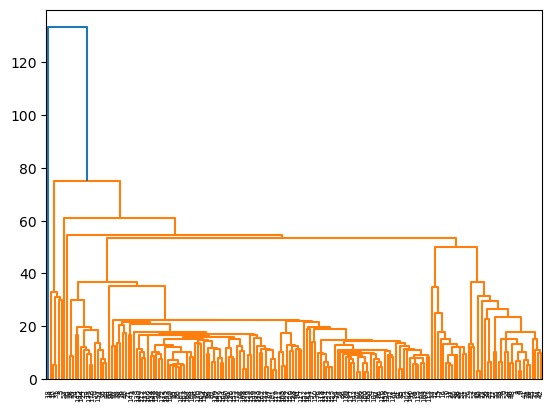

In [5]:
sl_euclideana = hierarchy.linkage(dist_euclideana, 'single')
dendrogram = hierarchy.dendrogram(sl_euclideana)

In [6]:
df_sl_euclideana = pd.DataFrame(X)
df_sl_euclideana['cluster'] = hierarchy.cut_tree(sl_euclideana, n_clusters=3)
df_sl_euclideana['silhueta'] = silhouette_samples(X, df_sl_euclideana.cluster)
df_sl_euclideana

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster,silhueta
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0.092641
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0.147999
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,-0.350353
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1,0.793648
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0.683964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,0,0.681515
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,0,0.674136
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,0,0.589324
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,0,0.583360


In [7]:
print("Média das silhuetas com distância euclideana", df_sl_euclideana.silhueta.mean())

Média das silhuetas com distância euclideana 0.48798203351890634


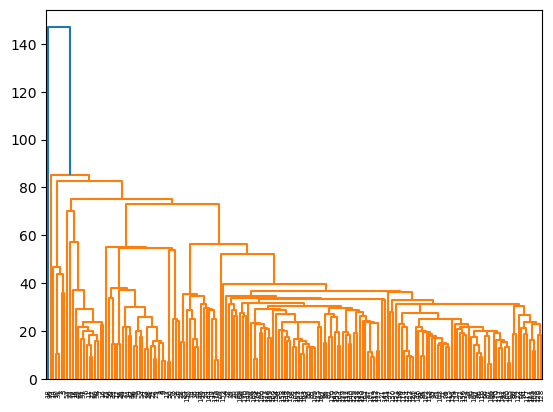

In [8]:
sl_cityblock = hierarchy.linkage(dist_cityblock, 'single')
dendrogram = hierarchy.dendrogram(sl_cityblock)

In [9]:
df_sl_cityblock = pd.DataFrame(X)
df_sl_cityblock['cluster'] = hierarchy.cut_tree(sl_cityblock, n_clusters=3)
df_sl_cityblock['silhueta'] = silhouette_samples(X, df_sl_cityblock.cluster)
df_sl_cityblock

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster,silhueta
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,-0.666436
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,-0.666439
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,-0.470256
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,-0.731641
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,-0.195742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,0,-0.190539
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,0,-0.242054
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,0,-0.612388
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,0,-0.631032


In [10]:
print("Média das silhuetas com distância cityblock", df_sl_cityblock.silhueta.mean())

Média das silhuetas com distância cityblock -0.06929245423622125


## **CL**

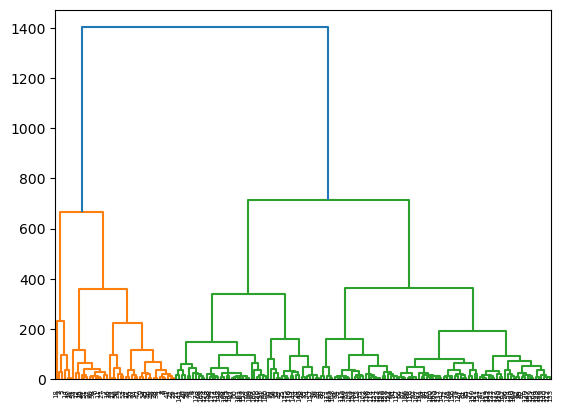

In [11]:
cl_euclideana = hierarchy.linkage(dist_euclideana, 'complete')
dendrogram = hierarchy.dendrogram(cl_euclideana)

In [12]:
df_cl_euclideana = pd.DataFrame(X)
df_cl_euclideana['cluster'] = hierarchy.cut_tree(cl_euclideana, n_clusters=3)
df_cl_euclideana['silhueta'] = silhouette_samples(X, df_cl_euclideana.cluster)
df_cl_euclideana

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster,silhueta
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0.409932
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0.358391
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0.661170
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0.591269
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1,0.635955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1,0.646617
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1,0.664950
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1,0.695216
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1,0.694184


In [13]:
print("Média das silhuetas com distância euclideana", df_cl_euclideana.silhueta.mean())

Média das silhuetas com distância euclideana 0.5418973703348594


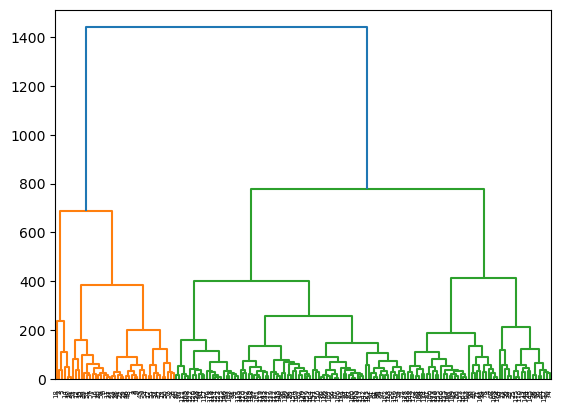

In [14]:
cl_cityblock = hierarchy.linkage(dist_cityblock, 'complete')
dendrogram = hierarchy.dendrogram(cl_cityblock)

In [15]:
df_cl_cityblock = pd.DataFrame(X)
df_cl_cityblock['cluster'] = hierarchy.cut_tree(cl_cityblock, n_clusters=3)
df_cl_cityblock['silhueta'] = silhouette_samples(X, df_cl_cityblock.cluster)
df_cl_cityblock

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster,silhueta
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0.409932
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0.358391
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0.661170
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0.591269
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1,0.635955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1,0.646617
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1,0.664950
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1,0.695216
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1,0.694184


In [16]:
print("Média das silhuetas com distância cityblock", df_cl_cityblock.silhueta.mean())

Média das silhuetas com distância cityblock 0.5418973703348594


## **AL**

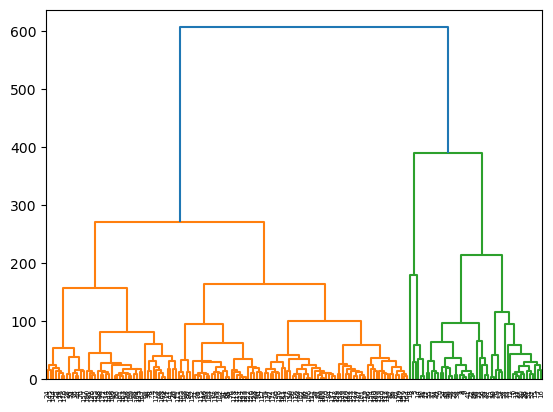

In [17]:
al_euclideana = hierarchy.linkage(dist_euclideana, 'average')
dendrogram = hierarchy.dendrogram(al_euclideana)

In [18]:
df_al_euclideana = pd.DataFrame(X)
df_al_euclideana['cluster'] = hierarchy.cut_tree(al_euclideana, n_clusters=3)
df_al_euclideana['silhueta'] = silhouette_samples(X, df_al_euclideana.cluster)
df_al_euclideana

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster,silhueta
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0.745501
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0.742580
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0.660007
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1,0.784723
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,0.536976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,0.526425
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,0.497843
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,0.145692
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,0.117893


In [19]:
print("Média das silhuetas com distância euclideana", df_al_euclideana.silhueta.mean())

Média das silhuetas com distância euclideana 0.6100753288756406


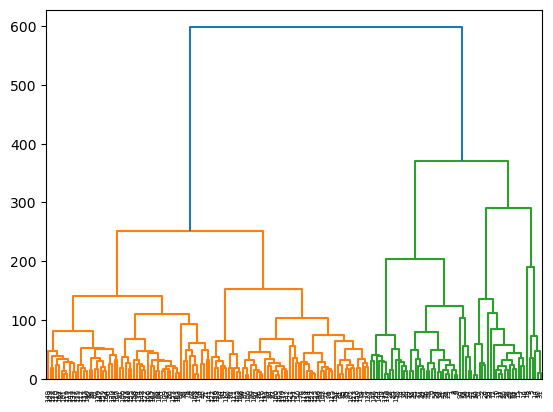

In [20]:
al_cityblock = hierarchy.linkage(dist_cityblock, 'average')
dendrogram = hierarchy.dendrogram(al_cityblock)

In [21]:
df_al_cityblock = pd.DataFrame(X)
df_al_cityblock['cluster'] = hierarchy.cut_tree(al_cityblock , n_clusters=3)
df_al_cityblock['silhueta'] = silhouette_samples(X, df_al_cityblock.cluster)
df_al_cityblock

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster,silhueta
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0.577279
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0.639201
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,0.275621
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1,0.620180
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,0.194544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,0.167452
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,0.092440
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,0,0.481923
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,0,0.505349


In [22]:
print("Média das silhuetas com distância cityblock", df_al_cityblock.silhueta.mean())

Média das silhuetas com distância cityblock 0.5840053145196977


## **K-means**

In [23]:
kmeans = KMeans(n_clusters=3,n_init=10,init='random',max_iter=300,random_state=0)
kmeans.fit(X)

C:\Users\Joao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=10, random_state=0)

In [24]:
df_km = pd.DataFrame(X)
df_km['cluster'] = kmeans.labels_
df_km['silhueta'] = silhouette_samples(X, kmeans.labels_)
df_km

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster,silhueta
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2,0.516178
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2,0.482042
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2,0.684513
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2,0.593218
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1,0.688007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1,0.692498
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1,0.696756
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1,0.642540
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1,0.628989


In [25]:
print("Média das silhuetas com K-means", df_km.silhueta.mean())

Média das silhuetas com K-means 0.5711381937868837


## **Resultados**

O algoritmo Average Link com distância euclideana apresentou o melhor resultado, visto que sua silhueta média é de 0.6100753288756406

In [26]:
from sklearn.metrics.cluster import adjusted_rand_score

C = df_al_euclideana.cluster
R = wine.target

RAND = adjusted_rand_score(C, R)
RAND

0.292626917173625